https://scikit-learn.org/1.5/modules/neural_networks_supervised.html

In [41]:
!pip install nilearn

In [42]:
import os
from nilearn import plotting
from nilearn import image
from nilearn.image import load_img
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets
from nilearn.maskers import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn.regions import connected_label_regions
import nibabel as nib
import pandas as pd
from sklearn import svm
from sklearn import metrics

In [43]:
# importamos la data en csv:
from google.colab import drive
drive.mount('/content/drive') # directorio de todas las carpetas

os.chdir("/content/drive/MyDrive/intento_cosas")
data = r'/content/drive/MyDrive/intento_cosas/reho_ica_bien.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
data = pd.read_csv(data, index_col=0)
data = data.sort_values(['file_name'])
data



,ica_1,ica_2,ica_3,ica_4,ica_5,ica_6,ica_7,ica_8,ica_9,ica_10,...,ica_12,ica_13,ica_14,ica_15,ica_16,ica_17,ica_18,ica_19,ica_20,label
file_name,,,,,,,,,,,,,,,,,,,,,
reho_101915_01.nii.gz,1.262992e-16,-8.734121e-17,-2.020158e-16,-3.468514e-16,-5.780857e-17,-5.655186e-18,3.104069e-16,-7.037565e-17,5.435262e-17,-1.269275e-16,...,1.319543e-16,1.847361e-16,-1.080769e-16,5.630052e-16,-1.570885e-17,1.181306e-16,2.035867e-16,9.048298e-17,1.021075e-16,1
reho_101915_02.nii.gz,-1.131037e-16,-1.234716e-16,3.050659e-16,4.687521e-16,3.770124e-17,6.157869e-17,-3.518783e-17,2.067285e-16,-2.010733e-17,-2.130120e-16,...,-3.499932e-16,-1.973032e-16,3.518783e-17,1.508050e-17,1.651000e-16,2.236940e-16,1.489199e-16,-2.262075e-17,1.919622e-16,1
reho_101915_03.nii.gz,4.150278e-16,5.906528e-17,5.824842e-16,1.583452e-16,-2.098702e-16,-1.219007e-16,3.558055e-16,-3.166904e-16,3.342843e-16,4.718939e-16,...,3.380545e-16,2.331193e-16,2.513416e-18,3.267441e-16,8.796956e-17,-2.161538e-16,2.438014e-16,-7.414578e-17,-2.412879e-16,1
reho_103515_01.nii.gz,-7.791590e-17,-5.077101e-16,-1.118470e-16,-1.608586e-16,-4.901161e-17,2.664221e-16,-1.360386e-16,2.111270e-16,1.526900e-16,-4.184838e-16,...,-1.558318e-16,-2.035867e-16,2.136404e-16,8.796956e-17,2.010733e-17,1.658855e-16,-5.328442e-16,2.010733e-16,-2.802459e-16,2
reho_103515_02.nii.gz,-3.066368e-16,-1.683989e-16,4.838326e-16,1.030501e-16,1.759391e-16,1.482916e-16,-3.669588e-16,3.776408e-16,2.337477e-16,2.758474e-16,...,-1.910196e-16,1.206440e-16,1.156171e-16,-3.356981e-16,-2.953264e-16,-1.621153e-16,1.344678e-16,-1.313260e-16,1.357245e-16,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
reho_987983_02.nii.gz,-1.124754e-16,-1.778242e-16,7.068983e-17,-9.064007e-17,1.256708e-18,1.495483e-16,3.053801e-16,1.784525e-16,-3.104069e-16,-2.764758e-17,...,-6.157869e-17,4.524149e-17,1.357245e-16,6.534882e-17,-2.915563e-16,-2.287209e-16,8.294273e-17,1.633720e-16,-2.262075e-17,1
reho_987983_03.nii.gz,-2.362611e-16,1.495483e-16,1.947897e-17,1.369812e-16,1.947897e-16,-4.147137e-17,1.156171e-16,1.131037e-16,3.518783e-17,-3.342843e-16,...,-8.922627e-17,2.513416e-18,1.382379e-17,-7.540248e-17,2.890429e-17,-5.026832e-17,5.278174e-17,4.398478e-17,2.890429e-16,1
reho_993675_01.nii.gz,-2.048434e-16,1.168738e-16,1.998166e-16,-2.387745e-17,6.534882e-17,-3.418246e-16,1.570885e-16,8.545615e-17,-3.016099e-17,-2.990965e-16,...,3.455947e-17,-6.880477e-17,-1.797093e-16,-4.838326e-17,7.540248e-17,2.513416e-17,-1.759391e-16,1.281842e-16,-3.964914e-16,1


In [45]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['label'])  # Eliminar la columna de grupo para usar solo las features
y = data['label']  # Esta será nuestra etiqueta

print(X, y)

                              ica_1         ica_2         ica_3         ica_4  \
file_name                                                                       
reho_101915_01.nii.gz  1.262992e-16 -8.734121e-17 -2.020158e-16 -3.468514e-16   
reho_101915_02.nii.gz -1.131037e-16 -1.234716e-16  3.050659e-16  4.687521e-16   
reho_101915_03.nii.gz  4.150278e-16  5.906528e-17  5.824842e-16  1.583452e-16   
reho_103515_01.nii.gz -7.791590e-17 -5.077101e-16 -1.118470e-16 -1.608586e-16   
reho_103515_02.nii.gz -3.066368e-16 -1.683989e-16  4.838326e-16  1.030501e-16   
...                             ...           ...           ...           ...   
reho_987983_02.nii.gz -1.124754e-16 -1.778242e-16  7.068983e-17 -9.064007e-17   
reho_987983_03.nii.gz -2.362611e-16  1.495483e-16  1.947897e-17  1.369812e-16   
reho_993675_01.nii.gz -2.048434e-16  1.168738e-16  1.998166e-16 -2.387745e-17   
reho_993675_02.nii.gz -1.759391e-17 -7.288907e-17 -5.026832e-17 -3.770124e-18   
reho_993675_03.nii.gz  7.288

In [46]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='rbf', C=100, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.42857143, 0.32142857, 0.39285714, 0.39285714, 0.32727273])

In [47]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.37 accuracy with a standard deviation of 0.04


In [48]:
# Para hacer cross-validation:
from sklearn.model_selection import GroupKFold
import numpy as np

# Número total de grupos
n_groups = X.shape[0]//3

# Crear el array repitiendo cada número 3 veces
groups = np.repeat(np.arange(n_groups), 3) # ponemos aquí nuestros 200 sujetos


# Definir GroupKFold
gkf = GroupKFold(n_splits=3) # número de folds

file_name
reho_101915_01.nii.gz    1
reho_101915_02.nii.gz    1
reho_101915_03.nii.gz    1
reho_103515_01.nii.gz    2
reho_103515_02.nii.gz    2
                        ..
reho_970764_02.nii.gz    1
reho_970764_03.nii.gz    1
reho_987983_01.nii.gz    1
reho_987983_02.nii.gz    1
reho_987983_03.nii.gz    1
Name: label, Length: 186, dtype: int64
              precision    recall  f1-score   support

           0       0.43      0.12      0.19        24
           1       0.45      0.71      0.56        42
           2       0.25      0.19      0.21        27

    accuracy                           0.41        93
   macro avg       0.38      0.34      0.32        93
weighted avg       0.39      0.41      0.36        93

file_name
reho_101915_01.nii.gz    1
reho_101915_02.nii.gz    1
reho_101915_03.nii.gz    1
reho_103515_01.nii.gz    2
reho_103515_02.nii.gz    2
                        ..
reho_987983_02.nii.gz    1
reho_987983_03.nii.gz    1
reho_993675_01.nii.gz    1
reho_993675_02.nii.g

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


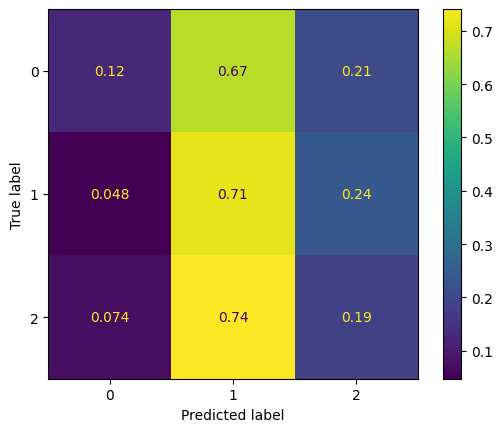

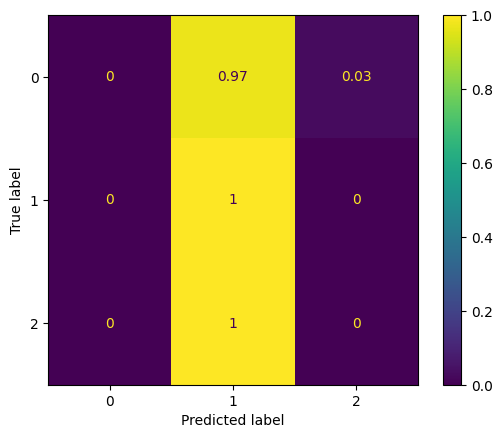

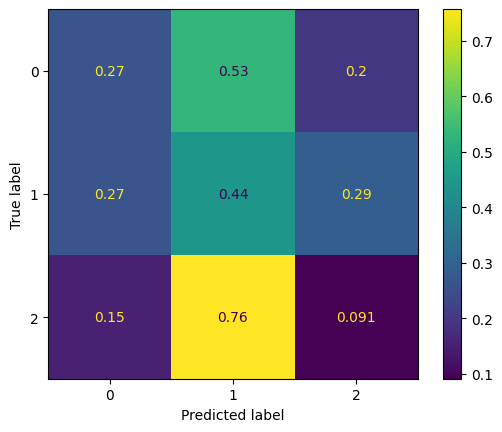

In [49]:
classif = svm.SVC()
from sklearn.metrics import classification_report

# Iterar sobre los splits
for train_idx, test_idx in gkf.split(X, y, groups):
    # Dividir los datos de entrenamiento y prueba usando iloc
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    classif.fit(X_train, y_train)
    y_pred = classif.predict(X_test)
    print(y_train)
    print(classification_report(y_test, y_pred))
    conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
    plot = metrics.ConfusionMatrixDisplay(conf_mat)
    plot.plot()


# Random Forest:

Probaremos ahora con otro modelo

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

file_name
reho_101915_01.nii.gz    1
reho_101915_02.nii.gz    1
reho_101915_03.nii.gz    1
reho_103515_01.nii.gz    2
reho_103515_02.nii.gz    2
                        ..
reho_970764_02.nii.gz    1
reho_970764_03.nii.gz    1
reho_987983_01.nii.gz    1
reho_987983_02.nii.gz    1
reho_987983_03.nii.gz    1
Name: label, Length: 186, dtype: int64
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.45      1.00      0.62        42
           2       0.00      0.00      0.00        27

    accuracy                           0.45        93
   macro avg       0.15      0.33      0.21        93
weighted avg       0.20      0.45      0.28        93



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


file_name
reho_101915_01.nii.gz    1
reho_101915_02.nii.gz    1
reho_101915_03.nii.gz    1
reho_103515_01.nii.gz    2
reho_103515_02.nii.gz    2
                        ..
reho_987983_02.nii.gz    1
reho_987983_03.nii.gz    1
reho_993675_01.nii.gz    1
reho_993675_02.nii.gz    1
reho_993675_03.nii.gz    1
Name: label, Length: 186, dtype: int64
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.32      1.00      0.49        30
           2       0.00      0.00      0.00        30

    accuracy                           0.32        93
   macro avg       0.11      0.33      0.16        93
weighted avg       0.10      0.32      0.16        93



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


file_name
reho_104820_01.nii.gz    2
reho_104820_02.nii.gz    2
reho_104820_03.nii.gz    2
reho_105923_01.nii.gz    2
reho_105923_02.nii.gz    2
                        ..
reho_930449_02.nii.gz    1
reho_930449_03.nii.gz    1
reho_993675_01.nii.gz    1
reho_993675_02.nii.gz    1
reho_993675_03.nii.gz    1
Name: label, Length: 186, dtype: int64
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.48      1.00      0.65        45
           2       0.00      0.00      0.00        33

    accuracy                           0.48        93
   macro avg       0.16      0.33      0.22        93
weighted avg       0.23      0.48      0.32        93



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


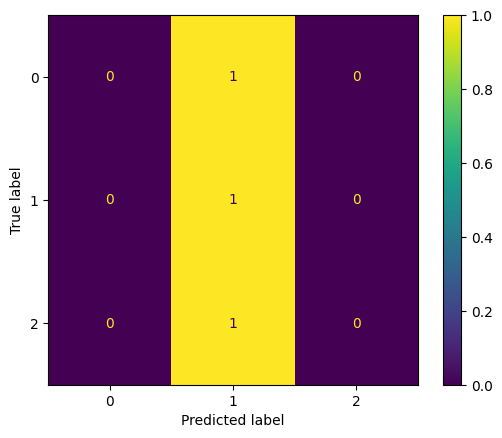

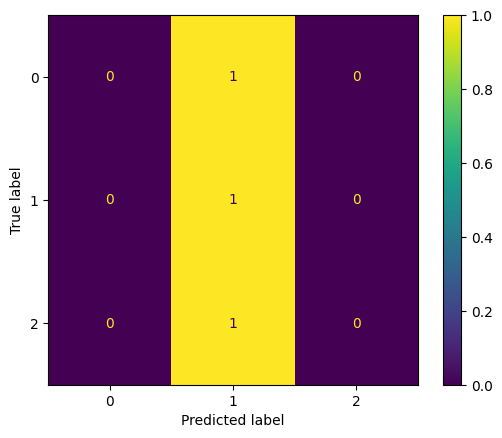

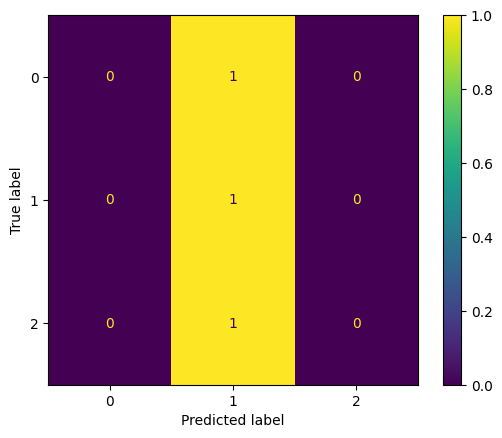

In [51]:
from sklearn.metrics import classification_report

# Iterar sobre los splits
for train_idx, test_idx in gkf.split(X, y, groups):
    # Dividir los datos de entrenamiento y prueba usando iloc
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    random_forest.fit(X_train, y_train)
    y_pred = random_forest.predict(X_test)
    print(y_train)
    print(classification_report(y_test, y_pred))
    conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
    plot = metrics.ConfusionMatrixDisplay(conf_mat)
    plot.plot()


In [52]:
# Obtener las importancias de cada feature
importances = random_forest.feature_importances_

# Crear un DataFrame para visualizar mejor las importancias
feature_names = X.columns  # Asumiendo que X es un DataFrame con los nombres de los ROIs
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar de mayor a menor importancia
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Imprimir las características más importantes
print(importances_df.head(10))  # Las 10 características más importantes

   Feature  Importance
0    ica_1         0.0
1    ica_2         0.0
18  ica_19         0.0
17  ica_18         0.0
16  ica_17         0.0
15  ica_16         0.0
14  ica_15         0.0
13  ica_14         0.0
12  ica_13         0.0
11  ica_12         0.0


In [53]:
# reho_ica_bien_0.csv

# importamos la data en csv:
from google.colab import drive
drive.mount('/content/drive') # directorio de todas las carpetas

os.chdir("/content/drive/MyDrive/intento_cosas")
luteo = r'/content/drive/MyDrive/intento_cosas/reho_ica_bien_2.csv'
menstr = r'/content/drive/MyDrive/intento_cosas/reho_ica_bien_0.csv'
prolif = r'/content/drive/MyDrive/intento_cosas/reho_ica_bien_1.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
data_lut = pd.read_csv(luteo, index_col=0)
data_lut = data_lut.sort_values(['file_name'])
data_lut

,ica_1,ica_2,ica_3,ica_4,ica_5,ica_6,ica_7,ica_8,ica_9,ica_10,...,ica_12,ica_13,ica_14,ica_15,ica_16,ica_17,ica_18,ica_19,ica_20,label
file_name,,,,,,,,,,,,,,,,,,,,,
reho_103515_01.nii.gz,-7.791590e-17,-5.077101e-16,-1.118470e-16,-1.608586e-16,-4.901161e-17,2.664221e-16,-1.360386e-16,2.111270e-16,1.526900e-16,-4.184838e-16,...,-1.558318e-16,-2.035867e-16,2.136404e-16,8.796956e-17,2.010733e-17,1.658855e-16,-5.328442e-16,2.010733e-16,-2.802459e-16,2
reho_103515_02.nii.gz,-3.066368e-16,-1.683989e-16,4.838326e-16,1.030501e-16,1.759391e-16,1.482916e-16,-3.669588e-16,3.776408e-16,2.337477e-16,2.758474e-16,...,-1.910196e-16,1.206440e-16,1.156171e-16,-3.356981e-16,-2.953264e-16,-1.621153e-16,1.344678e-16,-1.313260e-16,1.357245e-16,2
reho_103515_03.nii.gz,-6.723388e-17,1.759391e-16,-2.136404e-17,2.262075e-16,3.317709e-16,4.197405e-16,2.167821e-16,-3.867519e-16,4.021466e-17,-9.802323e-17,...,-5.529515e-17,3.317709e-16,6.396644e-16,-2.186672e-16,1.143604e-16,-7.339175e-16,2.136404e-17,-1.005366e-16,-1.294409e-16,2
reho_104820_01.nii.gz,1.087052e-16,-1.793951e-16,2.764758e-17,-4.775491e-17,1.131037e-17,-7.854425e-18,3.581618e-17,5.780857e-17,-2.538550e-16,1.272417e-16,...,1.885062e-17,1.325827e-16,-6.032199e-17,3.531350e-16,-9.802323e-17,3.569051e-16,-5.686604e-17,-9.990829e-17,5.466680e-17,2
reho_104820_02.nii.gz,9.488146e-17,1.043068e-16,-3.129203e-16,3.349127e-16,-3.657020e-16,-3.154337e-16,4.649820e-16,-4.272807e-17,-2.252649e-16,-3.016099e-17,...,1.105903e-16,-6.032199e-17,-2.010733e-16,1.055635e-16,-5.026832e-17,-2.262075e-17,-1.897629e-16,-3.895795e-17,5.403845e-17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
reho_809252_02.nii.gz,1.759391e-16,-1.633720e-16,2.010733e-17,1.508050e-17,-1.759391e-17,-1.520617e-16,-2.802459e-16,-1.131037e-16,-2.061001e-16,1.960465e-16,...,-3.770124e-17,1.482916e-16,3.996332e-16,-1.357245e-16,-7.037565e-17,-1.759391e-16,-8.294273e-17,-2.513416e-16,1.306976e-16,2
reho_809252_03.nii.gz,-5.278174e-17,-5.780857e-17,-4.147137e-17,-1.206440e-16,7.288907e-17,-1.306976e-16,3.518783e-17,3.468514e-16,-2.029584e-16,-1.759391e-16,...,-7.791590e-17,-2.513416e-17,2.852727e-16,3.493648e-16,1.683989e-16,4.932579e-16,-2.174105e-16,6.157869e-17,1.734257e-16,2
reho_822244_01.nii.gz,6.786224e-17,1.080769e-16,1.457781e-16,1.954181e-16,-2.513416e-17,3.016099e-17,4.524149e-17,-2.387745e-17,4.901161e-17,-1.005366e-17,...,5.403845e-17,-1.187589e-16,-9.299640e-17,-1.354103e-16,5.529515e-17,8.419944e-17,-1.005366e-17,-5.403845e-17,-2.481998e-17,2


In [55]:
data_men = pd.read_csv(menstr, index_col=0)
data_men = data_men.sort_values(['file_name'])
data_men

,ica_1,ica_2,ica_3,ica_4,ica_5,ica_6,ica_7,ica_8,ica_9,ica_10,...,ica_12,ica_13,ica_14,ica_15,ica_16,ica_17,ica_18,ica_19,ica_20,label
file_name,,,,,,,,,,,,,,,,,,,,,
reho_114823_01.nii.gz,-1.222149e-16,-1.200156e-16,1.049351e-16,9.990829e-17,3.016099e-17,-2.513416e-17,-1.256708e-17,1.131037e-16,-1.823798e-16,-2.262075e-17,...,-3.151195e-16,1.294409e-16,2.111270e-16,-1.256708e-16,-3.141770e-17,-2.133262e-16,1.633720e-17,2.519700e-16,-1.306976e-16,0
reho_114823_02.nii.gz,3.518783e-17,4.586984e-17,-5.780857e-17,2.095561e-16,-9.550981e-17,4.021466e-17,2.061001e-16,-2.387745e-17,9.299640e-17,3.342843e-16,...,1.219007e-16,-1.897629e-16,-1.306976e-16,-7.540248e-17,4.524149e-17,8.545615e-17,1.306976e-16,-3.493648e-16,-1.907054e-16,0
reho_114823_03.nii.gz,1.759391e-17,-2.940697e-16,-1.508050e-17,1.566172e-16,-4.059167e-16,1.005366e-17,-2.607669e-16,-6.283540e-18,-4.093726e-16,2.588819e-16,...,3.009816e-16,-2.236940e-16,-7.540248e-18,-2.161538e-16,2.513416e-17,1.156171e-16,5.655186e-17,-3.946063e-16,1.545751e-16,0
reho_117122_01.nii.gz,-1.885062e-18,1.586594e-16,1.583452e-16,9.048298e-17,-6.911894e-18,6.095034e-17,-2.073568e-16,8.419944e-17,2.871578e-16,-5.026832e-18,...,8.796956e-18,2.199239e-16,-1.105903e-16,-8.545615e-17,1.847361e-16,-8.357109e-17,1.388662e-16,2.840160e-16,1.621153e-16,0
reho_117122_02.nii.gz,-4.140853e-16,1.382379e-16,-3.003532e-16,2.293492e-16,-1.473490e-16,1.809660e-16,3.110352e-16,1.589736e-16,-4.649820e-17,5.026832e-17,...,-1.156171e-16,3.744990e-16,2.990965e-16,-2.419163e-16,1.256708e-17,1.621153e-16,3.493648e-16,2.337477e-16,-6.409211e-16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
reho_861456_02.nii.gz,3.487365e-16,6.516031e-16,0.000000e+00,2.236940e-16,-2.130120e-16,-7.653352e-16,-1.872495e-16,-8.419944e-17,2.268358e-16,3.631886e-16,...,-3.770124e-17,2.324910e-16,1.376095e-16,-4.341926e-16,-2.098702e-16,-3.314568e-16,-1.401229e-16,4.876027e-16,3.418246e-16,0
reho_861456_03.nii.gz,2.331193e-16,5.466680e-17,6.409211e-17,3.770124e-17,4.172271e-16,-1.206440e-16,4.247673e-16,5.755723e-16,-2.890429e-16,1.545751e-16,...,-8.796956e-17,-3.204606e-16,-9.927994e-17,1.219007e-16,2.670505e-17,6.095034e-17,2.252649e-16,-1.885062e-16,7.100401e-17,0
reho_902242_01.nii.gz,3.518783e-17,-2.324910e-17,2.186672e-16,9.425310e-17,1.156171e-16,2.387745e-16,-3.016099e-17,3.016099e-17,-2.648512e-16,2.086135e-16,...,3.217173e-16,1.709123e-16,3.016099e-16,-3.016099e-17,-6.534882e-17,-2.764758e-17,-2.513416e-16,-2.061001e-16,4.021466e-17,0


In [56]:
data_pr = pd.read_csv(prolif, index_col=0)
data_pr = data_pr.sort_values(['file_name'])
data_pr

,ica_1,ica_2,ica_3,ica_4,ica_5,ica_6,ica_7,ica_8,ica_9,ica_10,...,ica_12,ica_13,ica_14,ica_15,ica_16,ica_17,ica_18,ica_19,ica_20,label
file_name,,,,,,,,,,,,,,,,,,,,,
reho_101915_01.nii.gz,1.262992e-16,-8.734121e-17,-2.020158e-16,-3.468514e-16,-5.780857e-17,-5.655186e-18,3.104069e-16,-7.037565e-17,5.435262e-17,-1.269275e-16,...,1.319543e-16,1.847361e-16,-1.080769e-16,5.630052e-16,-1.570885e-17,1.181306e-16,2.035867e-16,9.048298e-17,1.021075e-16,1
reho_101915_02.nii.gz,-1.131037e-16,-1.234716e-16,3.050659e-16,4.687521e-16,3.770124e-17,6.157869e-17,-3.518783e-17,2.067285e-16,-2.010733e-17,-2.130120e-16,...,-3.499932e-16,-1.973032e-16,3.518783e-17,1.508050e-17,1.651000e-16,2.236940e-16,1.489199e-16,-2.262075e-17,1.919622e-16,1
reho_101915_03.nii.gz,4.150278e-16,5.906528e-17,5.824842e-16,1.583452e-16,-2.098702e-16,-1.219007e-16,3.558055e-16,-3.166904e-16,3.342843e-16,4.718939e-16,...,3.380545e-16,2.331193e-16,2.513416e-18,3.267441e-16,8.796956e-17,-2.161538e-16,2.438014e-16,-7.414578e-17,-2.412879e-16,1
reho_128632_01.nii.gz,-1.382379e-17,1.313260e-16,-1.702839e-16,1.281842e-16,-2.017016e-16,-7.540248e-17,1.365885e-16,6.157869e-17,1.822227e-17,1.859928e-16,...,-3.116636e-16,7.515114e-16,6.853772e-16,-1.658855e-16,2.840160e-16,2.513416e-17,-3.832960e-17,4.775491e-17,4.178554e-16,1
reho_128632_02.nii.gz,-5.529515e-17,5.224764e-16,-3.016099e-17,-1.671422e-16,-2.010733e-17,4.499015e-16,-3.506215e-16,-1.256708e-17,3.066368e-16,-3.990048e-16,...,2.412879e-16,5.366143e-16,1.357245e-16,4.209972e-16,3.782691e-16,4.750356e-16,3.468514e-16,1.457781e-16,-8.734121e-17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
reho_987983_02.nii.gz,-1.124754e-16,-1.778242e-16,7.068983e-17,-9.064007e-17,1.256708e-18,1.495483e-16,3.053801e-16,1.784525e-16,-3.104069e-16,-2.764758e-17,...,-6.157869e-17,4.524149e-17,1.357245e-16,6.534882e-17,-2.915563e-16,-2.287209e-16,8.294273e-17,1.633720e-16,-2.262075e-17,1
reho_987983_03.nii.gz,-2.362611e-16,1.495483e-16,1.947897e-17,1.369812e-16,1.947897e-16,-4.147137e-17,1.156171e-16,1.131037e-16,3.518783e-17,-3.342843e-16,...,-8.922627e-17,2.513416e-18,1.382379e-17,-7.540248e-17,2.890429e-17,-5.026832e-17,5.278174e-17,4.398478e-17,2.890429e-16,1
reho_993675_01.nii.gz,-2.048434e-16,1.168738e-16,1.998166e-16,-2.387745e-17,6.534882e-17,-3.418246e-16,1.570885e-16,8.545615e-17,-3.016099e-17,-2.990965e-16,...,3.455947e-17,-6.880477e-17,-1.797093e-16,-4.838326e-17,7.540248e-17,2.513416e-17,-1.759391e-16,1.281842e-16,-3.964914e-16,1


In [57]:
from sklearn.model_selection import train_test_split

# 2. Definir función para tomar el primer tercio de un DataFrame
mens = 21*3 #int(len(data_men)*0.7)
prlof = 25*3 #int(len(data_pr)*0.7)
lut = 25*3 #int(len(data_lut)*0.7)

# 3. Tomar solo el primer tercio de cada grupo
data_men_train = data_men.iloc[:mens]
data_pr_train = data_pr.iloc[:prlof]
data_lut_train = data_lut.iloc[:lut]

data_men_test = data_men.iloc[mens:]
data_pr_test = data_pr.iloc[prlof:]
data_lut_test = data_lut.iloc[lut:]

df_all = pd.concat([data_men, data_pr, data_lut], ignore_index=True)
X = df_all.drop(columns=['label'])  # Eliminar la columna de grupo para usar solo las features
y = df_all['label']  # Esta será nuestra etiqueta

# 4. Añadir una columna que indique el grupo al que pertenece cada muestra
data_men['label'] = 'menstrual'
data_pr['label'] = 'proliferativo'
data_lut['label'] = 'luteo'

# 5. Concatenar todos los datos en un solo DataFrame
df_all_train = pd.concat([data_men_train, data_pr_train, data_lut_train], ignore_index=True)
df_all_test = pd.concat([data_men_test, data_pr_test, data_lut_test], ignore_index=True)

# 6. Definir las características (X) y la etiqueta/grupo (y)
X_train = df_all_train.drop(columns=['label'])  # Eliminar la columna de grupo para usar solo las features
y_train = df_all_train['label']  # Esta será nuestra etiqueta

X_test = df_all_test.drop(columns=['label'])  # Eliminar la columna de grupo para usar solo las features
y_test = df_all_test['label']  # Esta será nuestra etiqueta

# 8. Ahora tienes tus sets de entrenamiento y testeo con el primer tercio de cada grupo:
print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de testeo: {X_test.shape[0]} muestras")


Conjunto de entrenamiento: 213 muestras
Conjunto de testeo: 66 muestras


In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # escala los datos para tener una media 0 y desviación estándar 1
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
import numpy as np

# Asegúrate de que los índices de y_train y X_train_scaled coincidan
y_train = y_train.reset_index(drop=True)

# Escalar los datos de X_train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Convertir X_train_scaled a DataFrame para facilitar la manipulación de índices
X_train_scaled = pd.DataFrame(X_train_scaled)
print(X_train_scaled)

           0         1         2         3         4         5         6   \
0   -0.622922 -0.531795  0.523250  0.576954  0.099148 -0.099683 -0.059527   
1    0.283779  0.356936 -0.279351  1.202641 -0.604820  0.231758  1.078461   
2    0.182431 -1.464289 -0.068629  0.900554 -2.343623  0.078785 -1.351209   
3    0.070225  0.961205  0.786652  0.523170 -0.108522  0.336926 -1.073252   
4   -2.304208  0.851797 -1.475504  1.315588 -0.895207  0.945630  1.624564   
..        ...       ...       ...       ...       ...       ...       ...   
208 -0.208482  0.035444 -0.768968 -0.394744 -0.119082 -0.227160  0.576503   
209  1.261061  0.441096 -0.302592  0.265006  0.746800 -0.214413 -0.020286   
210 -0.831046 -0.656352  0.340418 -1.262460 -1.862284  0.843648  1.215804   
211 -0.476329 -0.164857  0.668896 -1.606678  0.317379 -1.020706  0.224970   
212 -1.149568  1.161506  1.641932  1.290488 -0.379550 -0.969715 -1.468932   

           7         8         9         10        11        12        13  

In [60]:
# Definir los índices correspondientes a cada grupo
grupo_1_indices = np.arange(0, mens) #np.arange(0, 51)   # Primer grupo (y_train = 0)
grupo_2_indices = np.arange(mens, mens +prlof) #np.arange(51, 132) # Segundo grupo (y_train = 1)
grupo_3_indices = np.arange(mens + prlof, mens + prlof + lut) #np.arange(132, 196) # Tercer grupo (y_train = 2)

# Extraer los subconjuntos de X_train_scaled correspondientes a cada grupo
grupo_1 = X_train_scaled.iloc[grupo_1_indices]
grupo_2 = X_train_scaled.iloc[grupo_2_indices]
grupo_3 = X_train_scaled.iloc[grupo_3_indices]

# Imprimir los grupos
print("Grupo 1 (y_train = 0):")
print(grupo_1)

print("\nGrupo 2 (y_train = 1):")
print(grupo_2)

print("\nGrupo 3 (y_train = 2):")
print(grupo_3)


Grupo 1 (y_train = 0):
          0         1         2         3         4         5         6   \
0  -0.622922 -0.531795  0.523250  0.576954  0.099148 -0.099683 -0.059527   
1   0.283779  0.356936 -0.279351  1.202641 -0.604820  0.231758  1.078461   
2   0.182431 -1.464289 -0.068629  0.900554 -2.343623  0.078785 -1.351209   
3   0.070225  0.961205  0.786652  0.523170 -0.108522  0.336926 -1.073252   
4  -2.304208  0.851797 -1.475504  1.315588 -0.895207  0.945630  1.624564   
..       ...       ...       ...       ...       ...       ...       ...   
58 -1.685263 -0.817939 -0.564444  0.896072 -0.210598 -1.043015  1.075191   
59  0.196909 -0.211987 -0.031443  0.171781 -0.182439 -0.227160  0.581408   
60  1.029409 -0.010002  1.082591 -2.334555  0.510970  0.805405 -1.761604   
61  0.399605  1.470374 -0.057783 -0.609881  0.613046  1.901709  0.754723   
62  0.296447 -0.026834 -0.486973  0.817189  1.739395  0.467590  0.218429   

          7         8         9         10        11        12  

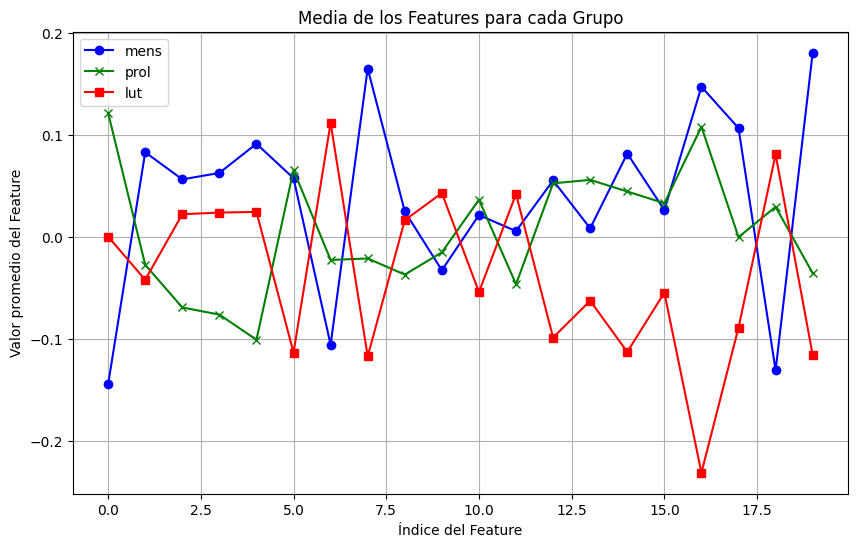

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

media_grupo_1 = np.mean(grupo_1, axis=0)
media_grupo_2 = np.mean(grupo_2, axis=0)
media_grupo_3 = np.mean(grupo_3, axis=0)

# Gráfica de las medias de cada feature para los 3 grupos
plt.figure(figsize=(10, 6))

# Graficar las medias de los features para cada grupo
plt.plot(media_grupo_1, marker='o', label='mens', color='blue')
plt.plot(media_grupo_2, marker='x', label='prol', color='green')
plt.plot(media_grupo_3, marker='s', label='lut', color='red')

# Configuración de la gráfica
plt.xlabel('Índice del Feature')
plt.ylabel('Valor promedio del Feature')
plt.title('Media de los Features para cada Grupo')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()



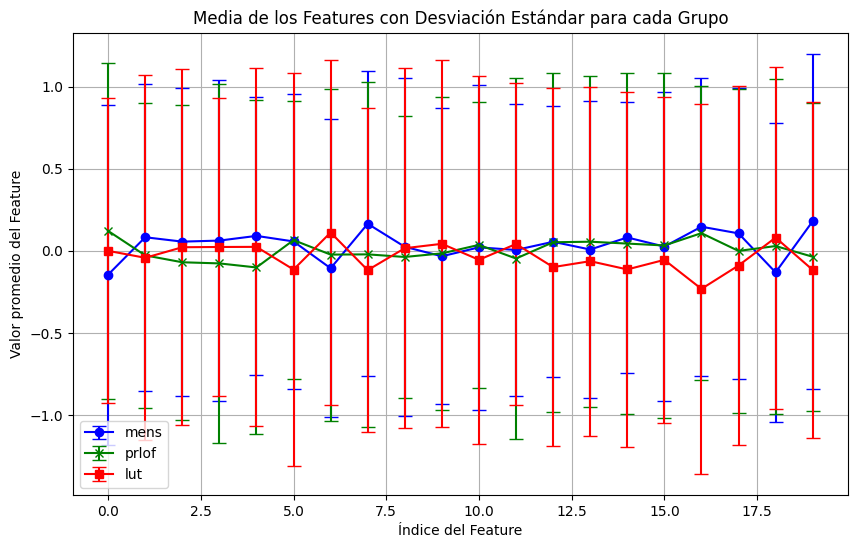

In [62]:
import numpy as np
import matplotlib.pyplot as plt

std_grupo_1 = np.std(grupo_1, axis=0)
std_grupo_2 = np.std(grupo_2, axis=0)
std_grupo_3 = np.std(grupo_3, axis=0)

# Gráfica de las medias de cada feature para los 3 grupos con barras de error
plt.figure(figsize=(10, 6))

# Graficar las medias de los features para cada grupo con barras de error (desviación estándar)
plt.errorbar(range(len(media_grupo_1)), media_grupo_1, yerr=std_grupo_1, marker='o', label='mens', color='blue', capsize=5)
plt.errorbar(range(len(media_grupo_2)), media_grupo_2, yerr=std_grupo_2, marker='x', label='prlof', color='green', capsize=5)
plt.errorbar(range(len(media_grupo_3)), media_grupo_3, yerr=std_grupo_3, marker='s', label='lut', color='red', capsize=5)

# Configuración de la gráfica
plt.xlabel('Índice del Feature')
plt.ylabel('Valor promedio del Feature')
plt.title('Media de los Features con Desviación Estándar para cada Grupo')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


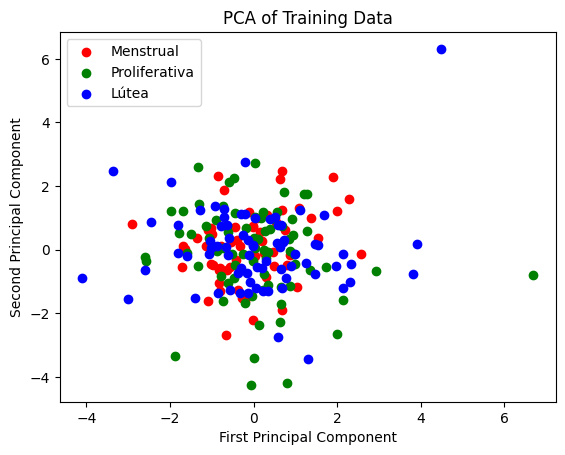

In [63]:
# graficamos nuestra data a ver cómo se comporta

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Configurar los colores y etiquetas para cada grupo
colors = ['r', 'g', 'b']  # Elige los colores que representarán a los grupos
labels = ['Menstrual', 'Proliferativa', 'Lútea']  # Nombres de los grupos
unique_labels = np.unique(y_train)  # Obtener los grupos únicos

# Graficar y agregar la leyenda
for i, label in enumerate(unique_labels):
    plt.scatter(X_pca[y_train == label, 0], X_pca[y_train == label, 1],
                color=colors[i], label=labels[i])

plt.title('PCA of Training Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()


In [64]:
classifier = svm.SVC() # mejor version:
# classifier = svm.SVC(kernel='rbf', gamma=0.1, C=100)
# classifier = svm.SVC(kernel='poly', degree=3, C=0.01)
# classifier = svm.SVC(kernel='linear')

classifier.fit(X_train_scaled, y_train)
y_predict = classifier.predict(X_test_scaled)

In [65]:
metrics.accuracy_score(y_test, y_predict)

0.3181818181818182

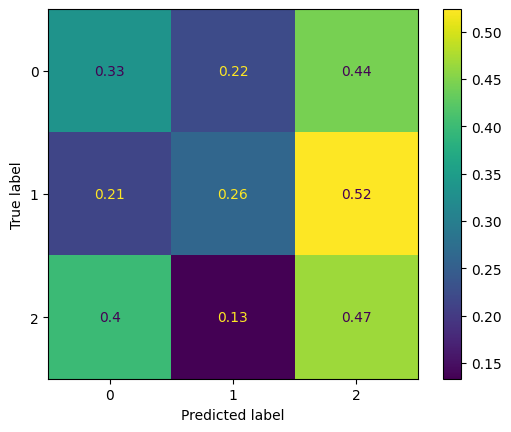

In [66]:
conf_mat = metrics.confusion_matrix(y_test, y_predict, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [67]:
classif = svm.SVC()
classif.fit(X_pca, y_train)

X_test_pca = pca.transform(X_test_scaled)  # Asegúrate de transformar tu conjunto de prueba

y_pred = classif.predict(X_test_pca)  # Predecir con el modelo entrenado en los datos transformados

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.45454545454545453


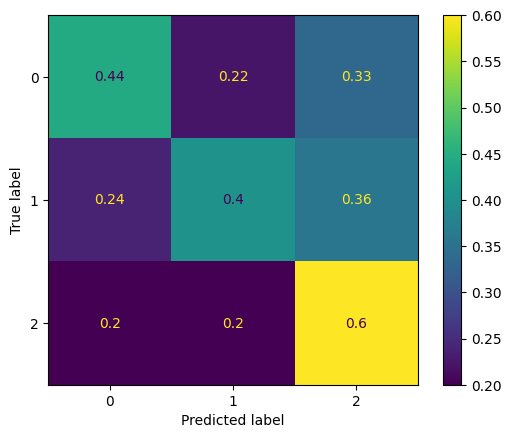

In [68]:
conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [71]:
y_pred = random_forest.predict(X_test_scaled)

# Imprimir los resultados de las métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.3787878787878788
Classification Report:
               precision    recall  f1-score   support

           0       0.07      0.11      0.08         9
           1       0.73      0.45      0.56        42
           2       0.20      0.33      0.25        15

    accuracy                           0.38        66
   macro avg       0.33      0.30      0.30        66
weighted avg       0.52      0.38      0.42        66



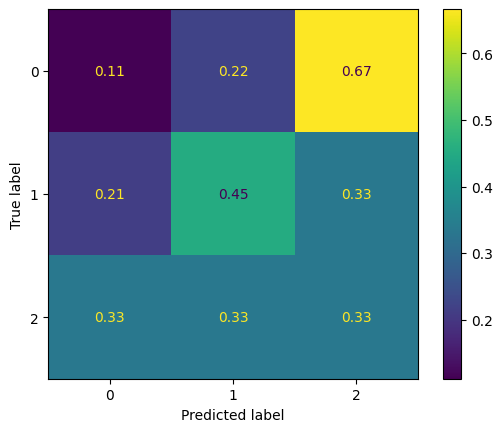

In [72]:
conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [73]:
# Obtener las importancias de cada feature
importances = random_forest.feature_importances_

# Crear un DataFrame para visualizar mejor las importancias
feature_names = X.columns  # Asumiendo que X es un DataFrame con los nombres de los ROIs
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar de mayor a menor importancia
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Imprimir las características más importantes
print(importances_df.head(10))  # Las 10 características más importantes

   Feature  Importance
19  ica_20    0.061776
4    ica_5    0.058073
0    ica_1    0.055157
6    ica_7    0.054800
5    ica_6    0.053618
16  ica_17    0.053188
14  ica_15    0.052809
3    ica_4    0.052454
7    ica_8    0.050120
8    ica_9    0.049470


In [74]:
pip install tensorflow

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Codificar las etiquetas (labels)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Convertir las etiquetas a one-hot encoding (ya que son 3 clases)
y_onehot = to_categorical(y_encoded)

# Dividir en sets de entrenamiento y prueba (X_train, X_test, y_train, y_test)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Estandarizar los datos (normalizar los features)
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled1.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(3, activation='softmax'))  # Capa de salida (tres clases)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled1, y_train1, epochs=50, batch_size=16, validation_data=(X_test_scaled1, y_test1))

# Evaluar el modelo en el set de prueba
loss, accuracy = model.evaluate(X_test_scaled1, y_test1)
print(f"Precisión del modelo en el set de prueba: {accuracy * 100:.2f}%")

# Hacer predicciones con el modelo entrenado
predicciones = model.predict(X_test_scaled)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.2982 - loss: 1.3318 - val_accuracy: 0.3036 - val_loss: 1.2090
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3134 - loss: 1.1661 - val_accuracy: 0.3036 - val_loss: 1.1447
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4216 - loss: 1.0782 - val_accuracy: 0.3214 - val_loss: 1.1374
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4763 - loss: 1.0541 - val_accuracy: 0.3214 - val_loss: 1.1387
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4788 - loss: 1.0152 - val_accuracy: 0.3393 - val_loss: 1.1428
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4931 - loss: 1.0054 - val_accuracy: 0.2857 - val_loss: 1.1539
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5079 - loss: 0.9738 - val_accuracy: 0.2679 - val_loss: 1.1629
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5664 - loss: 0.9347 - val_accuracy: 0.2857 - val_loss: 1.1705

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Matriz de confusión:
[[ 1  9  5]
 [ 5 12  5]
 [ 3 13  3]]


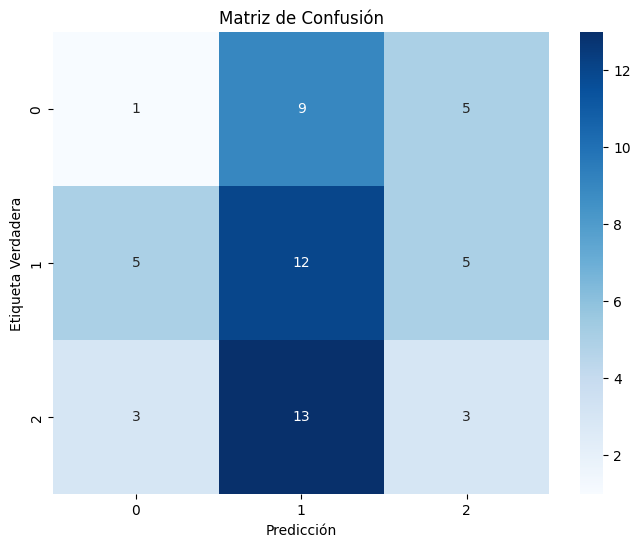

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Hacer predicciones en el set de prueba
predicciones = model.predict(X_test_scaled1)

# Convertir las predicciones de one-hot encoding a clases
y_pred_classes = np.argmax(predicciones, axis=1)

# Convertir las etiquetas verdaderas (y_test) de one-hot encoding a clases
y_true_classes = np.argmax(y_test1, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()



In [77]:
# Codificar las etiquetas (labels)
encoder = LabelEncoder()
y_encoded_test = encoder.fit_transform(y_test)
y_encoded_train = encoder.fit_transform(y_train)

# Estandarizar los datos (normalizar los features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_onehot_test = to_categorical(y_encoded_test)
y_onehot_train = to_categorical(y_encoded_train)

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled1.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(3, activation='softmax'))  # Capa de salida (tres clases)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled, y_onehot_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_onehot_test))

# Evaluar el modelo en el set de prueba
loss, accuracy = model.evaluate(X_test_scaled, y_onehot_test)
print(f"Precisión del modelo en el set de prueba: {accuracy * 100:.2f}%")

# Hacer predicciones con el modelo entrenado
predicciones = model.predict(X_test_scaled)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.3843 - loss: 1.1045 - val_accuracy: 0.4848 - val_loss: 1.0792
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4721 - loss: 1.0151 - val_accuracy: 0.4697 - val_loss: 1.0816
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4576 - loss: 1.0204 - val_accuracy: 0.4545 - val_loss: 1.1087
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5052 - loss: 1.0017 - val_accuracy: 0.4697 - val_loss: 1.0999
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5692 - loss: 0.9445 - val_accuracy: 0.4545 - val_loss: 1.1081
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5883 - loss: 0.9255 - val_accuracy: 0.4545 - val_loss: 1.1089
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5983 - loss: 0.8946 - val_accuracy: 0.4242 - val_loss: 1.1252
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6061 - loss: 0.8856 - val_accuracy: 0.4242 - val_loss: 1.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Matriz de confusión:
[[ 5  1  3]
 [13 14 15]
 [ 6  4  5]]


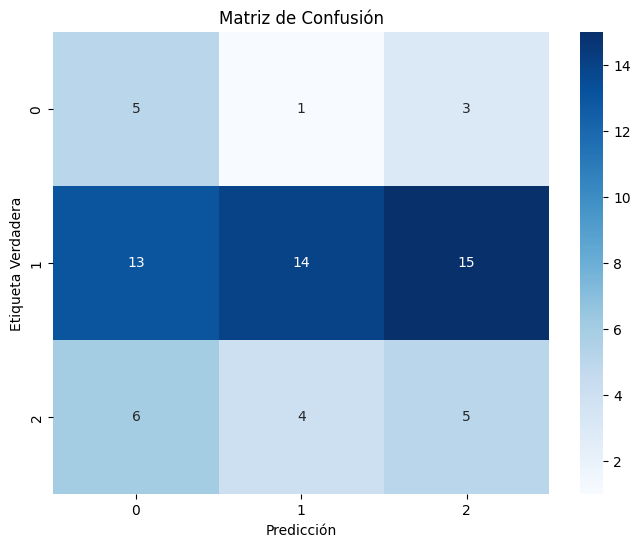

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Hacer predicciones en el set de prueba
predicciones = model.predict(X_test_scaled)

# Convertir las predicciones de one-hot encoding a clases
y_pred_classes = np.argmax(predicciones, axis=1)

# Convertir las etiquetas verdaderas (y_test) de one-hot encoding a clases
y_true_classes = np.argmax(y_onehot_test, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

